In [3]:
from generate_declarative_sentences import generate_declarative_statements
from categorise_sentences import QuestionCategoryAssigner, StatementCategoryAssigner
from dataset_processing import DatasetPreProcessor

model_name = "qwen3:4b"

In [4]:
#generate a small sample of declarative sentences from the NYC SQuAD dataset
declarative_sentences_dataset = generate_declarative_statements(5, model_name)
#use this dataset to assign categories to the questions and statements
question_assigner = QuestionCategoryAssigner(declarative_sentences_dataset)
question_assigner.generate_statement_categories(model_name)
statement_assigner = StatementCategoryAssigner(declarative_sentences_dataset)
statement_assigner.generate_statement_categories(model_name)
declarative_sentences_dataset

2025-11-10 08:13:34,626 - generate_declarative_sentences - INFO - 🚀 Starting project: Training-and-evaluating-cognitive-language-models
2025-11-10 08:13:34,627 - generate_declarative_sentences - INFO - 
--- Model Config ---
2025-11-10 08:13:34,628 - generate_declarative_sentences - INFO -    options: {'num_ctx': 4096, 'repeat_last_n': 64, 'repeat_penalty': 1.5, 'temperature': 0.0, 'seed': 42, 'num_predict': 100, 'top_k': 1, 'top_p': 0.1, 'min_p': 0.0}
2025-11-10 08:13:34,630 - generate_declarative_sentences - INFO -    model: qwen3:4b
2025-11-10 08:13:34,630 - generate_declarative_sentences - INFO - 
--- Final Settings (as JSON) ---
2025-11-10 08:13:34,631 - generate_declarative_sentences - INFO - {
  "WANDB_API_KEY": "super_secret_key_12345abcdef",
  "project_name": "Training-and-evaluating-cognitive-language-models",
  "dataset": {
    "dataset_directory": "datasets/squad_dataset"
  },
  "ollama": {
    "options": {
      "num_ctx": 4096,
      "repeat_last_n": 64,
      "repeat_pena

,id,title,context,question,answers,declarative_statement,question_category,statement_category
0,5733be284776f41900661182,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",To whom did the Virgin Mary allegedly appear i...,"{'text': ['Saint Bernadette Soubirous'], 'answ...",the Virgin Mary allegedly appeared to Saint Be...,Subject-Verb-Object,Subject-Verb-Object
1,5733be284776f4190066117f,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,"{'text': ['a copper statue of Christ'], 'answe...",a copper statue of Christ is in front of the N...,Subject-Verb-Object,Subject-Verb-Object
2,5733be284776f41900661180,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,"{'text': ['the Main Building'], 'answer_start'...",The Basilica of the Sacred Heart at Notre Dame...,Subject-Verb-Object,Subject-Verb-Object
3,5733be284776f41900661181,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,{'text': ['a Marian place of prayer and reflec...,The Grotto at Notre Dame is a Marian place of ...,Subject-Verb-Object,Subject-Verb-Object
4,5733be284776f4190066117e,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,{'text': ['a golden statue of the Virgin Mary'...,a golden statue of the Virgin Mary sits on top...,Subject-Verb-Object,Subject-Verb-Object


In [6]:
#for testing convenience, save the dataset to a jsonl file
declarative_sentences_dataset.to_json("declarative_sentences_dataset_sample.jsonl", orient="records", lines=True)


In [ ]:
if 'declarative_sentences_dataset' not in locals():
    import pandas as pd

    declarative_sentences_dataset = pd.read_json('declarative_sentences_dataset_sample.jsonl', lines=True)
declarative_sentences_dataset

In [7]:
#apply the formatting rules to the dataset
datasetPreProcessor = DatasetPreProcessor(declarative_sentences_dataset)
datasetPreProcessor.preprocess_data()
declarative_sentences_dataset

,id,title,context,question,declarative_statement,question_category,statement_category,answer,declarative_statement_formatted,question_formatted,answer_formatted
0,5733be284776f41900661182,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",To whom did the Virgin Mary allegedly appear i...,the Virgin Mary allegedly appeared to Saint Be...,Subject-Verb-Object,Subject-Verb-Object,Saint Bernadette Soubirous,the Virgin-Mary allegedly appeared to Saint-Be...,? to whom did the Virgin-Mary allegedly appear...,Saint-Bernadette-Soubirous
1,5733be284776f4190066117f,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,a copper statue of Christ is in front of the N...,Subject-Verb-Object,Subject-Verb-Object,a copper statue of Christ,a copper statue of Christ is in front of the N...,? what is in front of the Notre-Dame-Main-Buil...,a copper statue of Christ
2,5733be284776f41900661180,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,The Basilica of the Sacred Heart at Notre Dame...,Subject-Verb-Object,Subject-Verb-Object,the Main Building,the Basilica of the Sacred-Heart at Notre-Dame...,? the Basilica of the Sacred heart at Notre-Da...,the Main-Building
3,5733be284776f41900661181,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,The Grotto at Notre Dame is a Marian place of ...,Subject-Verb-Object,Subject-Verb-Object,a Marian place of prayer and reflection,the Grotto at Notre-Dame is a Marian place of ...,? what is the Grotto at Notre-Dame,a Marian place of prayer and reflection
4,5733be284776f4190066117e,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,a golden statue of the Virgin Mary sits on top...,Subject-Verb-Object,Subject-Verb-Object,a golden statue of the Virgin Mary,a golden statue of the Virgin-Mary sits on top...,? what sits on top of the Main-Building at Not...,a golden statue of the Virgin-Mary


In [ ]:
#todo add lemmatisation and POS tagging to columns
# use the POS tagging to identify goals as part of command generation

In [9]:
#split the following sentence into words, taking into account proper nouns
declarative_sentence = "the English call -ed New Amsterdam New York after its capture"
import nltk
import nltk

nltk.download('punkt_tab')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

words = word_tokenize(declarative_sentence)
words



[nltk_data] Downloading package punkt_tab to /Users/chris/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /Users/chris/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['the',
 'English',
 'call',
 '-ed',
 'New',
 'Amsterdam',
 'New',
 'York',
 'after',
 'its',
 'capture']

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/chris/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/chris/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /Users/chris/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/chris/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/chris/nltk_data...
[nltk_data]   Package words is already up-to-date!


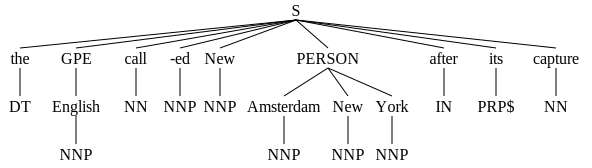

In [15]:
import nltk

nltk.download('averaged_perceptron_tagger_eng')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker_tab')
nltk.download('maxent_ne_chunker')
nltk.download('words')

declarative_sentence = "the English call -ed New Amsterdam New York after its capture"

# Tokenize and POS tag the sentence
tokens = nltk.word_tokenize(declarative_sentence)
pos_tags = nltk.pos_tag(tokens)

# Perform Named Entity Recognition
named_entities = nltk.ne_chunk(pos_tags)

named_entities

In [17]:
type(named_entities)

nltk.tree.tree.Tree